In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sys import exit
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
    
df_original = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv",encoding = "ISO-8859-1")
df=df_original.copy()

#filter=df_original["state"]=='Idaho'
filter=df_original["state"].isin(['Colorado','Idaho','Utah'])
df_original=df_original[filter]
filter=df_original["date"]>='2020-04-10'
df_original=df_original[filter]

filter=df["state"].isin(['Colorado','Idaho','Utah'])
df=df[filter]
filter=df["date"]>='2020-04-10'
df=df[filter]

#col_names=["fips","cases","deaths"]
#features_to_scale=df[col_names]
#scaler=StandardScaler().fit(features_to_scale.values)
#features_to_scale=scaler.transform(features_to_scale.values)
#df2=pd.DataFrame(features_to_scale,columns=col_names)
#col_names2=["county","state","date"]
#buff=df[col_names2]
#df3=pd.DataFrame(buff,columns=col_names2)

#df=pd.concat([df3,df2])
df_original=df_original.sort_values(['county'],ascending=True)
#print (df_original['deaths'].sum())
#print (df_original['deaths'].max())

def pct30(column):
        return column.quantile(0.3)

#county_counts_sorted=df_original['county'].value_counts()
#print("Occurrences:" + str(county_counts_sorted))

print("deaths by county " +str(df_original.groupby(["state","county",'date'])["cases","deaths"].agg([max])))

#results=df_original.pivot_table(index="county",columns='date', values='deaths',fill_value=0, margins=True,aggfunc=[np.mean, np.median])

#results=df_original.pivot_table(index="county",columns='date', values='deaths',fill_value=0)
#print(results)
#print(results.shape)


#plt.figure(figsize=(16, 9))
#plt.plot( color='r')
#plt.title('# of Coronavirus Cases', size=30)
#plt.xlabel('county', size=30)
#plt.ylabel('date', size=30)
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.show()

#elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.7)
#standardScaler=StandardScaler()
#pca=decomposition.PCA()
#imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
#elasticnet.fit(X_train, y_train)
#y_pred_enet = elasticnet.predict(X_test)

#steps = [('imputation', imputer),
#         ('scalar', standardScaler),
#         ('elasticnet', elasticnet)]
#steps = [('pca', pca),
#         ('sc', standardScaler),
#         ('elasticnet', elasticnet)]

          
#pipeline = Pipeline(steps)

#n_components = list(range(1,X.shape[1]+1,1))
#normalize = [True, False]
#selection = ['cyclic', 'random']
#parameters = dict(pca__n_components=n_components,
#                      elasticnet__normalize=normalize,
#                      elasticnet__selection=selection)
# Create train and test sets


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
#svm_confirmed.fit(X_train, y_train)
#svm_pred = svm_confirmed.predict(future_forcast)

#svm_test_pred = svm_confirmed.predict(X_test)
#plt.plot(y_test)
#plt.plot(svm_test_pred)
#plt.legend(['Test Data', 'SVM Predictions'])
#print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
#print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

# Create the GridSearchCV object: gm_cv
#gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
#elasticnet.fit(X_train,y_train)

# Compute and print the metrics
#r2 = gm_cv.score(X_test, y_test)          


#mojave_homelessness = homelessness[(homelessness['state']).isin(canu)]

deaths by county                            cases deaths
                             max    max
state    county date                   
Colorado Adams  2020-04-10   543     23
                2020-04-11   593     25
                2020-04-12   647     26
                2020-04-13   693     26
                2020-04-14   726     27
...                          ...    ...
Utah     Weber  2020-04-17   105      1
                2020-04-18   105      1
                2020-04-19   110      1
                2020-04-20   119      1
                2020-04-21   119      1

[1356 rows x 2 columns]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [4]:
results=df_original.pivot_table(index=["state","county"],columns='date', values=['deaths','cases'],fill_value=0)
df_results=pd.DataFrame(results.to_records())
df_results.reset_index()

state_dummy=pd.get_dummies(df_results['state'])
county_dummy=pd.get_dummies(df_results['county'])

#df_results=pd.concat(df_results,state_dummy,county_dummy)

#df_results.index(['state','county'])
print(results.head(5))

print(df_results.shape)
#print(results.isna())
#print(df_original)
#print(results.head(5))

#Print(df_results.head(1000))
#X=df_results[:,1]
#y=df_results[:,0]
#print(X)



                        cases                                              \
date               2020-04-10 2020-04-11 2020-04-12 2020-04-13 2020-04-14   
state    county                                                             
Colorado Adams            543        593        647        693        726   
         Alamosa            7          7          7          7          7   
         Arapahoe         931        998       1083       1142       1183   
         Archuleta          6          6          6          6          6   
         Baca               9         10         10         10         10   

                                                                           \
date               2020-04-15 2020-04-16 2020-04-17 2020-04-18 2020-04-19   
state    county                                                             
Colorado Adams            758        805        860        894        915   
         Alamosa            7          7          7          7          7  

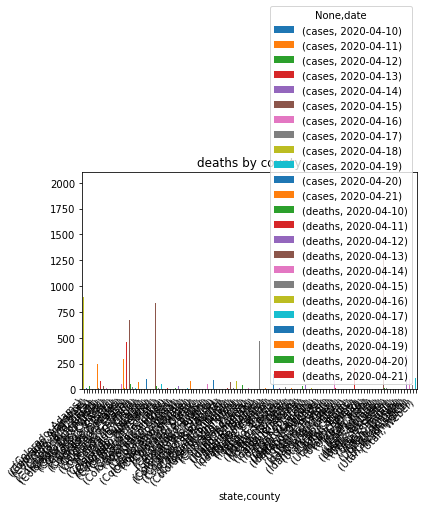

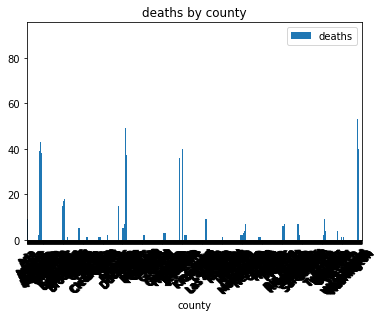

<Figure size 432x288 with 0 Axes>

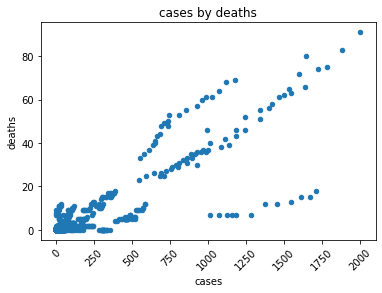

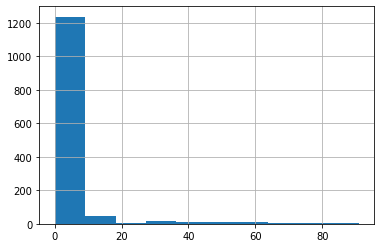

In [5]:
results.plot(kind="bar", title="deaths by county")
plt.xticks(rotation=45, ha='right')
plt.show()

df_original.plot(kind="bar", 
             x="county",
             y="deaths",
             title="deaths by county",rot=45)
#plt.xticks(rotation=45, ha='right')
plt.show()

plt.clf()

results.plot(kind="scatter", 
             x="cases",
             y="deaths",
             title="cases by deaths",rot=45)
#plt.xticks(rotation=45, ha='right')
plt.show()

df_original['deaths'].hist()
plt.show()


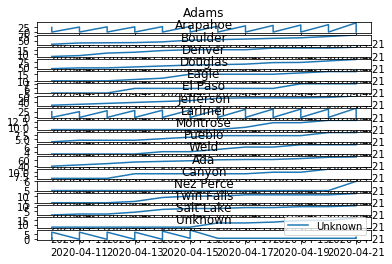

In [6]:
#df.set_index(['state','county'])
#df=df[df['deaths']>20]
deaths=df['deaths'].tolist()
cases=df['cases'].tolist()
counties=df['county'].tolist()
counties=df.groupby(['state','county'])['deaths'].max()>5
#counties=df.groupby(['state','county'])
#counties.apply(lambda x: x['deaths'].max()>20)
#filtered=counties.filter(lambda x: x>10.)
#print(filtered)


counties=counties.loc[counties.values==True]
#print(counties)
counties.reset_index()
#print(counties)
counties=pd.merge(df,counties,how='inner',on=['state','county'])
counties=counties[counties['deaths_y']==True]
#print(counties)
counties=counties['county'].unique()

rows=len(counties)
fig,ax = plt.subplots(rows,1)
index=0

for item in counties:
    deaths=df[df['county']==item]
    deaths=deaths['deaths'].tolist()
    cases=df[df['county']==item]
    cases=cases['cases'].tolist()
    dates=df[df['county']==item]
    #dates=pd.to_datetime(dates['date']).dt.date.unique().tolist()
    dates=pd.to_datetime(dates['date']).dt.date.tolist()
    #print(dates)
    #dates=dates['date'].unique()
    ax[index].plot(dates,deaths,label=item)
    ax[index].set_title(item)
 
    index+=1
    #plt.plot(dates,deaths,label=item)
    
plt.legend()  
plt.show()

        county  deaths  cases
13      Denver      91   2004
2     Arapahoe      80   1649
55        Weld      69   1180
16     El Paso      53    744
0        Adams      46    996
..         ...     ...    ...
67     Caribou       0      1
65       Camas       0      1
64    Boundary       0      1
63  Bonneville       0     16
58       Adams       0      3

[116 rows x 3 columns]


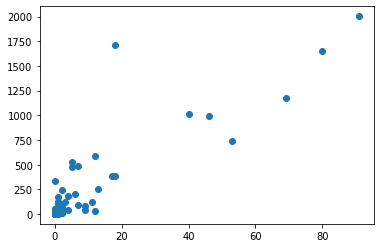

In [7]:
deaths=df.groupby(['state','county'])['deaths'].max().tolist()
cases =df.groupby(['state','county'])['cases'].max().tolist()
county=df.groupby(['state','county'])['county'].max().tolist()

#print(county)
#print(deaths)
#print(len(county))

dict={'county':county,
     'deaths':deaths,
     'cases':cases}
combined=pd.DataFrame(dict)
combined=combined.sort_values('deaths',ascending=False)


print(combined)


# Make scatter plot
plt.scatter(deaths,cases)
plt.show()

The correlation between x and y is 1.00


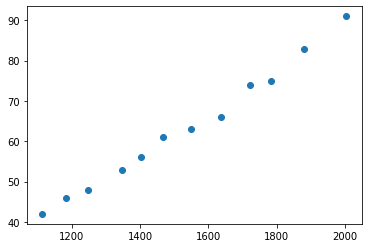

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]]


In [8]:
import statsmodels.api as sm

deaths=df.groupby(['date'])['deaths'].max()
cases =df.groupby(['date'])['cases'].max()

correlation = cases.corr(deaths)
print("The correlation between x and y is %4.2f" %(correlation))

dfx = pd.DataFrame(deaths, columns=['deaths'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

result=sm.OLS(cases,dfx1).fit()


#plt.scatter(cases,result)

plt.scatter(cases,deaths)
plt.show()


days_in_future = 20
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-20]
print(adjusted_dates)

In [9]:
import numpy as np

input_data=np.array([2,3])
weights={'node_0':np.array([1,1]),
        'node_1':np.array([-1,1]),
        'output':np.array([2,-1])}
node_0_value=(input_data * weights['node_0']).sum()
node_1_value=(input_data * weights['node_1']).sum()

hidden_layer_values=np.array([node_0_value,node_1_value])
print(hidden_layer_values)

output=(hidden_layer_values * weights['output']).sum()
print(output)

#tanh

node_0_value=(input_data * weights['node_0']).sum()
node_0_output=np.tanh(node_0_value)
node_1_value=(input_data * weights['node_1']).sum()
node_1_output=np.tanh(node_1_value)
hidden_layer_values=np.array([node_0_output,node_1_output])
print(hidden_layer_values)

output=(hidden_layer_values * weights['output']).sum()
print(output)

#adding an activation function
#ReLU (Rectified Linear Activation) 0 if x<0 and x if X>0


[5 1]
9
[0.9999092  0.76159416]
1.2382242525694254


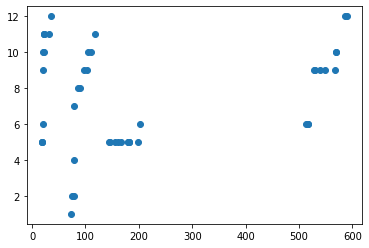

5


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:69: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/3000
33/33 [==============================] - 0s 4ms/step - loss: 61.9009 - accuracy: 0.0000e+00
Epoch 2/3000
33/33 [==============================] - 0s 91us/step - loss: 53.5730 - accuracy: 0.0000e+00
Epoch 3/3000
33/33 [==============================] - 0s 92us/step - loss: 44.5051 - accuracy: 0.0000e+00
Epoch 4/3000
33/33 [==============================] - 0s 105us/step - loss: 33.6777 - accuracy: 0.0000e+00
Epoch 5/3000
33/33 [==============================] - 0s 181us/step - loss: 22.1159 - accuracy: 0.0000e+00
Epoch 6/3000
33/33 [==============================] - 0s 167us/step - loss: 7.5764 - accuracy: 0.0606
Epoch 7/3000
33/33 [==============================] - 0s 318us/step - loss: 8.3237 - accuracy: 0.3333
Epoch 8/3000
33/33 [==============================] - 0s 197us/step - loss: 7.2336 - accuracy: 0.3333
Epoch 9/3000
33/33 [==============================] - 0s 136us/step - loss: 6.3749 - accuracy: 0.3333
Epoch 10/3000
33/33 [==============================] - 0s 227

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 25/3000
33/33 [==============================] - 0s 136us/step - loss: 5.0240 - accuracy: 0.3636
Epoch 26/3000
33/33 [==============================] - 0s 149us/step - loss: 6.2657 - accuracy: 0.1212
Epoch 27/3000
33/33 [==============================] - 0s 136us/step - loss: 8.9725 - accuracy: 0.0909
Epoch 28/3000
33/33 [==============================] - 0s 136us/step - loss: 5.9125 - accuracy: 0.1515
Epoch 29/3000
33/33 [==============================] - 0s 121us/step - loss: 6.8673 - accuracy: 0.0606
Epoch 30/3000
33/33 [==============================] - 0s 136us/step - loss: 11.1644 - accuracy: 0.1818
Epoch 31/3000
33/33 [==============================] - 0s 136us/step - loss: 6.4283 - accuracy: 0.0606
Epoch 32/3000
33/33 [==============================] - 0s 136us/step - loss: 5.0776 - accuracy: 0.3636
Epoch 33/3000
33/33 [==============================] - 0s 136us/step - loss: 4.8139 - accuracy: 0.3636
Epoch 34/3000
33/33 [==============================] - 0s 167us/step - l

33/33 [==============================] - 0s 121us/step - loss: 6.9648 - accuracy: 0.2727
Epoch 105/3000
33/33 [==============================] - 0s 91us/step - loss: 4.5882 - accuracy: 0.0606
Epoch 106/3000
33/33 [==============================] - 0s 91us/step - loss: 5.0355 - accuracy: 0.1212
Epoch 107/3000
33/33 [==============================] - 0s 106us/step - loss: 5.9386 - accuracy: 0.1515
Epoch 108/3000
33/33 [==============================] - 0s 182us/step - loss: 4.4466 - accuracy: 0.0909
Epoch 109/3000
33/33 [==============================] - 0s 91us/step - loss: 6.3601 - accuracy: 0.3333
Epoch 110/3000
33/33 [==============================] - 0s 121us/step - loss: 4.7212 - accuracy: 0.3333
Epoch 111/3000
33/33 [==============================] - 0s 136us/step - loss: 4.6727 - accuracy: 0.3333
Epoch 112/3000
33/33 [==============================] - 0s 152us/step - loss: 7.5999 - accuracy: 0.1515
Epoch 113/3000
33/33 [==============================] - 0s 121us/step - loss: 5.50

33/33 [==============================] - 0s 136us/step - loss: 6.1108 - accuracy: 0.2727
Epoch 183/3000
33/33 [==============================] - 0s 121us/step - loss: 5.1281 - accuracy: 0.3030
Epoch 184/3000
33/33 [==============================] - 0s 121us/step - loss: 5.4940 - accuracy: 0.1515
Epoch 185/3000
33/33 [==============================] - 0s 137us/step - loss: 4.6763 - accuracy: 0.3333
Epoch 186/3000
33/33 [==============================] - 0s 212us/step - loss: 6.1775 - accuracy: 0.3030
Epoch 187/3000
33/33 [==============================] - 0s 91us/step - loss: 6.3237 - accuracy: 0.0909
Epoch 188/3000
33/33 [==============================] - 0s 166us/step - loss: 9.0946 - accuracy: 0.1818
Epoch 189/3000
33/33 [==============================] - 0s 106us/step - loss: 6.8943 - accuracy: 0.1515
Epoch 190/3000
33/33 [==============================] - 0s 91us/step - loss: 4.8232 - accuracy: 0.1515
Epoch 191/3000
33/33 [==============================] - 0s 136us/step - loss: 4.4

Epoch 261/3000
33/33 [==============================] - 0s 182us/step - loss: 5.9131 - accuracy: 0.2121
Epoch 262/3000
33/33 [==============================] - 0s 121us/step - loss: 4.8493 - accuracy: 0.1212
Epoch 263/3000
33/33 [==============================] - 0s 166us/step - loss: 5.1713 - accuracy: 0.2121
Epoch 264/3000
33/33 [==============================] - 0s 152us/step - loss: 5.6182 - accuracy: 0.3030
Epoch 265/3000
33/33 [==============================] - 0s 91us/step - loss: 5.1366 - accuracy: 0.2727
Epoch 266/3000
33/33 [==============================] - 0s 121us/step - loss: 8.4599 - accuracy: 0.0909
Epoch 267/3000
33/33 [==============================] - 0s 167us/step - loss: 8.6634 - accuracy: 0.1212
Epoch 268/3000
33/33 [==============================] - 0s 91us/step - loss: 4.5333 - accuracy: 0.0909
Epoch 269/3000
33/33 [==============================] - 0s 91us/step - loss: 6.4534 - accuracy: 0.2727
Epoch 270/3000
33/33 [==============================] - 0s 167us/st

33/33 [==============================] - 0s 121us/step - loss: 6.5467 - accuracy: 0.2727
Epoch 340/3000
33/33 [==============================] - 0s 121us/step - loss: 5.4312 - accuracy: 0.3030
Epoch 341/3000
33/33 [==============================] - 0s 121us/step - loss: 4.3989 - accuracy: 0.1212
Epoch 342/3000
33/33 [==============================] - 0s 137us/step - loss: 4.9519 - accuracy: 0.1212
Epoch 343/3000
33/33 [==============================] - 0s 136us/step - loss: 4.3809 - accuracy: 0.1212
Epoch 344/3000
33/33 [==============================] - 0s 91us/step - loss: 5.5195 - accuracy: 0.3030
Epoch 345/3000
33/33 [==============================] - 0s 106us/step - loss: 5.3804 - accuracy: 0.1515
Epoch 346/3000
33/33 [==============================] - 0s 106us/step - loss: 4.3504 - accuracy: 0.1212
Epoch 347/3000
33/33 [==============================] - 0s 151us/step - loss: 5.4224 - accuracy: 0.3030
Epoch 348/3000
33/33 [==============================] - 0s 243us/step - loss: 4.

33/33 [==============================] - 0s 104us/step - loss: 4.8505 - accuracy: 0.2727
Epoch 418/3000
33/33 [==============================] - 0s 122us/step - loss: 4.5800 - accuracy: 0.2727
Epoch 419/3000
33/33 [==============================] - 0s 151us/step - loss: 4.4192 - accuracy: 0.3030
Epoch 420/3000
33/33 [==============================] - 0s 121us/step - loss: 5.0420 - accuracy: 0.1515
Epoch 421/3000
33/33 [==============================] - 0s 121us/step - loss: 5.1897 - accuracy: 0.3030
Epoch 422/3000
33/33 [==============================] - 0s 107us/step - loss: 4.3417 - accuracy: 0.3333
Epoch 423/3000
33/33 [==============================] - 0s 121us/step - loss: 4.7328 - accuracy: 0.1212
Epoch 424/3000
33/33 [==============================] - 0s 106us/step - loss: 5.7052 - accuracy: 0.3030
Epoch 425/3000
33/33 [==============================] - 0s 106us/step - loss: 5.5624 - accuracy: 0.3030
Epoch 426/3000
33/33 [==============================] - 0s 152us/step - loss: 5

33/33 [==============================] - 0s 182us/step - loss: 4.5033 - accuracy: 0.3636
Epoch 496/3000
33/33 [==============================] - 0s 121us/step - loss: 5.9393 - accuracy: 0.3030
Epoch 497/3000
33/33 [==============================] - 0s 92us/step - loss: 4.7202 - accuracy: 0.0909
Epoch 498/3000
33/33 [==============================] - 0s 212us/step - loss: 5.9101 - accuracy: 0.3030
Epoch 499/3000
33/33 [==============================] - 0s 121us/step - loss: 5.9373 - accuracy: 0.3030
Epoch 500/3000
33/33 [==============================] - 0s 121us/step - loss: 5.7630 - accuracy: 0.3030
Epoch 501/3000
33/33 [==============================] - 0s 136us/step - loss: 4.8290 - accuracy: 0.0909
Epoch 502/3000
33/33 [==============================] - 0s 167us/step - loss: 4.4660 - accuracy: 0.3333
Epoch 503/3000
33/33 [==============================] - 0s 136us/step - loss: 4.3839 - accuracy: 0.3636
Epoch 504/3000
33/33 [==============================] - 0s 151us/step - loss: 4.

33/33 [==============================] - 0s 151us/step - loss: 6.1096 - accuracy: 0.0303
Epoch 574/3000
33/33 [==============================] - 0s 197us/step - loss: 5.1894 - accuracy: 0.3030
Epoch 575/3000
33/33 [==============================] - 0s 182us/step - loss: 4.5726 - accuracy: 0.3636
Epoch 576/3000
33/33 [==============================] - 0s 212us/step - loss: 4.4489 - accuracy: 0.3636
Epoch 577/3000
33/33 [==============================] - 0s 136us/step - loss: 4.3867 - accuracy: 0.3636
Epoch 578/3000
33/33 [==============================] - 0s 164us/step - loss: 4.3460 - accuracy: 0.3636
Epoch 579/3000
33/33 [==============================] - 0s 121us/step - loss: 5.0213 - accuracy: 0.1212
Epoch 580/3000
33/33 [==============================] - 0s 106us/step - loss: 5.4025 - accuracy: 0.3030
Epoch 581/3000
33/33 [==============================] - 0s 227us/step - loss: 4.3862 - accuracy: 0.3333
Epoch 582/3000
33/33 [==============================] - 0s 152us/step - loss: 4

33/33 [==============================] - 0s 167us/step - loss: 5.3946 - accuracy: 0.1818
Epoch 652/3000
33/33 [==============================] - 0s 182us/step - loss: 4.4724 - accuracy: 0.3636
Epoch 653/3000
33/33 [==============================] - 0s 167us/step - loss: 4.2645 - accuracy: 0.3333
Epoch 654/3000
33/33 [==============================] - 0s 106us/step - loss: 4.2538 - accuracy: 0.4242
Epoch 655/3000
33/33 [==============================] - 0s 136us/step - loss: 4.1834 - accuracy: 0.3333
Epoch 656/3000
33/33 [==============================] - 0s 121us/step - loss: 5.8589 - accuracy: 0.3030
Epoch 657/3000
33/33 [==============================] - 0s 136us/step - loss: 4.9018 - accuracy: 0.3030
Epoch 658/3000
33/33 [==============================] - 0s 152us/step - loss: 4.1912 - accuracy: 0.3333
Epoch 659/3000
33/33 [==============================] - 0s 121us/step - loss: 4.9869 - accuracy: 0.3030
Epoch 660/3000
33/33 [==============================] - 0s 182us/step - loss: 4

33/33 [==============================] - 0s 197us/step - loss: 4.3979 - accuracy: 0.3939
Epoch 730/3000
33/33 [==============================] - 0s 167us/step - loss: 4.8912 - accuracy: 0.3030
Epoch 731/3000
33/33 [==============================] - 0s 121us/step - loss: 5.2774 - accuracy: 0.2727
Epoch 732/3000
33/33 [==============================] - 0s 121us/step - loss: 4.8991 - accuracy: 0.3030
Epoch 733/3000
33/33 [==============================] - 0s 318us/step - loss: 5.8691 - accuracy: 0.2727
Epoch 734/3000
33/33 [==============================] - 0s 152us/step - loss: 5.7967 - accuracy: 0.2727
Epoch 735/3000
33/33 [==============================] - 0s 151us/step - loss: 4.9294 - accuracy: 0.2727
Epoch 736/3000
33/33 [==============================] - 0s 152us/step - loss: 5.6045 - accuracy: 0.2727
Epoch 737/3000
33/33 [==============================] - 0s 121us/step - loss: 4.6980 - accuracy: 0.2727
Epoch 738/3000
33/33 [==============================] - 0s 152us/step - loss: 5

33/33 [==============================] - 0s 152us/step - loss: 4.9920 - accuracy: 0.2727
Epoch 808/3000
33/33 [==============================] - 0s 182us/step - loss: 5.3571 - accuracy: 0.0606
Epoch 809/3000
33/33 [==============================] - 0s 288us/step - loss: 4.3279 - accuracy: 0.3333
Epoch 810/3000
33/33 [==============================] - 0s 167us/step - loss: 4.2176 - accuracy: 0.3636
Epoch 811/3000
33/33 [==============================] - 0s 167us/step - loss: 4.1840 - accuracy: 0.3636
Epoch 812/3000
33/33 [==============================] - 0s 167us/step - loss: 5.2320 - accuracy: 0.3030
Epoch 813/3000
33/33 [==============================] - 0s 227us/step - loss: 4.4485 - accuracy: 0.3636
Epoch 814/3000
33/33 [==============================] - 0s 242us/step - loss: 4.2808 - accuracy: 0.3333
Epoch 815/3000
33/33 [==============================] - 0s 197us/step - loss: 5.8088 - accuracy: 0.1212
Epoch 816/3000
33/33 [==============================] - 0s 227us/step - loss: 4

33/33 [==============================] - 0s 106us/step - loss: 4.8159 - accuracy: 0.2727
Epoch 886/3000
33/33 [==============================] - 0s 91us/step - loss: 4.0812 - accuracy: 0.3636
Epoch 887/3000
33/33 [==============================] - 0s 136us/step - loss: 4.0969 - accuracy: 0.3636
Epoch 888/3000
33/33 [==============================] - 0s 76us/step - loss: 5.6992 - accuracy: 0.0909
Epoch 889/3000
33/33 [==============================] - 0s 91us/step - loss: 5.8183 - accuracy: 0.0909
Epoch 890/3000
33/33 [==============================] - 0s 90us/step - loss: 4.2328 - accuracy: 0.3939
Epoch 891/3000
33/33 [==============================] - 0s 121us/step - loss: 5.8701 - accuracy: 0.1212
Epoch 892/3000
33/33 [==============================] - 0s 91us/step - loss: 4.5761 - accuracy: 0.3939
Epoch 893/3000
33/33 [==============================] - 0s 91us/step - loss: 4.2685 - accuracy: 0.4242
Epoch 894/3000
33/33 [==============================] - 0s 106us/step - loss: 4.9404 

33/33 [==============================] - 0s 197us/step - loss: 5.1143 - accuracy: 0.2727
Epoch 965/3000
33/33 [==============================] - 0s 151us/step - loss: 4.5884 - accuracy: 0.1818
Epoch 966/3000
33/33 [==============================] - 0s 364us/step - loss: 4.9191 - accuracy: 0.2727
Epoch 967/3000
33/33 [==============================] - 0s 136us/step - loss: 4.3135 - accuracy: 0.3333
Epoch 968/3000
33/33 [==============================] - 0s 136us/step - loss: 4.5766 - accuracy: 0.2727
Epoch 969/3000
33/33 [==============================] - 0s 121us/step - loss: 4.1770 - accuracy: 0.3030
Epoch 970/3000
33/33 [==============================] - 0s 136us/step - loss: 4.1539 - accuracy: 0.3636
Epoch 971/3000
33/33 [==============================] - 0s 167us/step - loss: 4.4217 - accuracy: 0.2727
Epoch 972/3000
33/33 [==============================] - 0s 182us/step - loss: 4.1535 - accuracy: 0.3636
Epoch 973/3000
33/33 [==============================] - 0s 182us/step - loss: 4

33/33 [==============================] - 0s 121us/step - loss: 4.1244 - accuracy: 0.4242
Epoch 1043/3000
33/33 [==============================] - 0s 106us/step - loss: 3.9801 - accuracy: 0.3636
Epoch 1044/3000
33/33 [==============================] - 0s 106us/step - loss: 4.8204 - accuracy: 0.2727
Epoch 1045/3000
33/33 [==============================] - 0s 91us/step - loss: 4.8608 - accuracy: 0.2727
Epoch 1046/3000
33/33 [==============================] - 0s 91us/step - loss: 4.3841 - accuracy: 0.2727
Epoch 1047/3000
33/33 [==============================] - 0s 121us/step - loss: 4.1541 - accuracy: 0.2727
Epoch 1048/3000
33/33 [==============================] - 0s 121us/step - loss: 4.0202 - accuracy: 0.4242
Epoch 1049/3000
33/33 [==============================] - 0s 106us/step - loss: 3.9543 - accuracy: 0.3636
Epoch 1050/3000
33/33 [==============================] - 0s 91us/step - loss: 4.7692 - accuracy: 0.2727
Epoch 1051/3000
33/33 [==============================] - 0s 106us/step - l

33/33 [==============================] - 0s 121us/step - loss: 4.0759 - accuracy: 0.3030
Epoch 1120/3000
33/33 [==============================] - 0s 151us/step - loss: 4.0587 - accuracy: 0.2727
Epoch 1121/3000
33/33 [==============================] - 0s 105us/step - loss: 4.0220 - accuracy: 0.3030
Epoch 1122/3000
33/33 [==============================] - 0s 121us/step - loss: 4.0072 - accuracy: 0.3030
Epoch 1123/3000
33/33 [==============================] - 0s 152us/step - loss: 4.2440 - accuracy: 0.2727
Epoch 1124/3000
33/33 [==============================] - 0s 273us/step - loss: 4.0348 - accuracy: 0.3636
Epoch 1125/3000
33/33 [==============================] - 0s 182us/step - loss: 3.9711 - accuracy: 0.3636
Epoch 1126/3000
33/33 [==============================] - 0s 91us/step - loss: 4.3345 - accuracy: 0.2727
Epoch 1127/3000
33/33 [==============================] - 0s 136us/step - loss: 4.0086 - accuracy: 0.3636
Epoch 1128/3000
33/33 [==============================] - 0s 136us/step -

33/33 [==============================] - 0s 121us/step - loss: 5.2791 - accuracy: 0.0606
Epoch 1198/3000
33/33 [==============================] - 0s 121us/step - loss: 4.6458 - accuracy: 0.3030
Epoch 1199/3000
33/33 [==============================] - 0s 152us/step - loss: 4.0215 - accuracy: 0.3333
Epoch 1200/3000
33/33 [==============================] - 0s 106us/step - loss: 4.0911 - accuracy: 0.3333
Epoch 1201/3000
33/33 [==============================] - 0s 121us/step - loss: 5.1771 - accuracy: 0.1212
Epoch 1202/3000
33/33 [==============================] - 0s 104us/step - loss: 4.5964 - accuracy: 0.3636
Epoch 1203/3000
33/33 [==============================] - 0s 955us/step - loss: 4.4949 - accuracy: 0.4242
Epoch 1204/3000
33/33 [==============================] - 0s 121us/step - loss: 4.3060 - accuracy: 0.3333
Epoch 1205/3000
33/33 [==============================] - 0s 136us/step - loss: 4.5402 - accuracy: 0.3636
Epoch 1206/3000
33/33 [==============================] - 0s 151us/step 

33/33 [==============================] - 0s 121us/step - loss: 4.0242 - accuracy: 0.3636
Epoch 1276/3000
33/33 [==============================] - 0s 167us/step - loss: 3.9822 - accuracy: 0.3636
Epoch 1277/3000
33/33 [==============================] - 0s 136us/step - loss: 5.4030 - accuracy: 0.2727
Epoch 1278/3000
33/33 [==============================] - 0s 167us/step - loss: 4.7850 - accuracy: 0.2727
Epoch 1279/3000
33/33 [==============================] - 0s 152us/step - loss: 5.9955 - accuracy: 0.0303
Epoch 1280/3000
33/33 [==============================] - 0s 167us/step - loss: 4.1031 - accuracy: 0.3030
Epoch 1281/3000
33/33 [==============================] - 0s 212us/step - loss: 4.0510 - accuracy: 0.3030
Epoch 1282/3000
33/33 [==============================] - 0s 152us/step - loss: 5.2201 - accuracy: 0.3030
Epoch 1283/3000
33/33 [==============================] - 0s 182us/step - loss: 3.9872 - accuracy: 0.3333
Epoch 1284/3000
33/33 [==============================] - 0s 182us/step 

33/33 [==============================] - 0s 120us/step - loss: 4.6961 - accuracy: 0.3333
Epoch 1354/3000
33/33 [==============================] - 0s 106us/step - loss: 5.8216 - accuracy: 0.3030
Epoch 1355/3000
33/33 [==============================] - 0s 91us/step - loss: 4.9538 - accuracy: 0.3030
Epoch 1356/3000
33/33 [==============================] - 0s 106us/step - loss: 3.9841 - accuracy: 0.3030
Epoch 1357/3000
33/33 [==============================] - 0s 91us/step - loss: 4.0081 - accuracy: 0.1515
Epoch 1358/3000
33/33 [==============================] - 0s 91us/step - loss: 4.5945 - accuracy: 0.1515
Epoch 1359/3000
33/33 [==============================] - 0s 106us/step - loss: 3.9859 - accuracy: 0.3030
Epoch 1360/3000
33/33 [==============================] - 0s 91us/step - loss: 3.9529 - accuracy: 0.3030
Epoch 1361/3000
33/33 [==============================] - 0s 106us/step - loss: 4.4414 - accuracy: 0.2727
Epoch 1362/3000
33/33 [==============================] - 0s 152us/step - lo

33/33 [==============================] - 0s 106us/step - loss: 5.0677 - accuracy: 0.2727
Epoch 1432/3000
33/33 [==============================] - 0s 76us/step - loss: 4.2637 - accuracy: 0.3333
Epoch 1433/3000
33/33 [==============================] - 0s 106us/step - loss: 4.2626 - accuracy: 0.3333
Epoch 1434/3000
33/33 [==============================] - 0s 136us/step - loss: 5.4605 - accuracy: 0.3030
Epoch 1435/3000
33/33 [==============================] - 0s 121us/step - loss: 4.3984 - accuracy: 0.2727
Epoch 1436/3000
33/33 [==============================] - 0s 121us/step - loss: 4.9018 - accuracy: 0.2727
Epoch 1437/3000
33/33 [==============================] - 0s 91us/step - loss: 4.3981 - accuracy: 0.3333
Epoch 1438/3000
33/33 [==============================] - 0s 91us/step - loss: 4.2624 - accuracy: 0.3636
Epoch 1439/3000
33/33 [==============================] - 0s 197us/step - loss: 4.8599 - accuracy: 0.2727
Epoch 1440/3000
33/33 [==============================] - 0s 152us/step - l

33/33 [==============================] - 0s 121us/step - loss: 4.1829 - accuracy: 0.3333
Epoch 1510/3000
33/33 [==============================] - 0s 106us/step - loss: 4.3454 - accuracy: 0.3333
Epoch 1511/3000
33/33 [==============================] - 0s 121us/step - loss: 4.2087 - accuracy: 0.3636
Epoch 1512/3000
33/33 [==============================] - 0s 76us/step - loss: 5.0905 - accuracy: 0.1212
Epoch 1513/3000
33/33 [==============================] - 0s 106us/step - loss: 4.5007 - accuracy: 0.3636
Epoch 1514/3000
33/33 [==============================] - 0s 136us/step - loss: 4.2400 - accuracy: 0.3636
Epoch 1515/3000
33/33 [==============================] - 0s 136us/step - loss: 4.1571 - accuracy: 0.3939
Epoch 1516/3000
33/33 [==============================] - 0s 151us/step - loss: 4.1198 - accuracy: 0.3939
Epoch 1517/3000
33/33 [==============================] - 0s 167us/step - loss: 4.8475 - accuracy: 0.2727
Epoch 1518/3000
33/33 [==============================] - 0s 121us/step -

33/33 [==============================] - 0s 106us/step - loss: 4.5668 - accuracy: 0.0909
Epoch 1587/3000
33/33 [==============================] - 0s 135us/step - loss: 5.4575 - accuracy: 0.0909
Epoch 1588/3000
33/33 [==============================] - 0s 104us/step - loss: 6.3233 - accuracy: 0.1212
Epoch 1589/3000
33/33 [==============================] - 0s 106us/step - loss: 5.5091 - accuracy: 0.0909
Epoch 1590/3000
33/33 [==============================] - 0s 105us/step - loss: 5.5217 - accuracy: 0.0909
Epoch 1591/3000
33/33 [==============================] - 0s 136us/step - loss: 6.4683 - accuracy: 0.1515
Epoch 1592/3000
33/33 [==============================] - 0s 121us/step - loss: 4.5253 - accuracy: 0.2727
Epoch 1593/3000
33/33 [==============================] - 0s 136us/step - loss: 4.4344 - accuracy: 0.3030
Epoch 1594/3000
33/33 [==============================] - 0s 137us/step - loss: 4.5601 - accuracy: 0.3333
Epoch 1595/3000
33/33 [==============================] - 0s 91us/step -

33/33 [==============================] - 0s 197us/step - loss: 4.1857 - accuracy: 0.3333
Epoch 1665/3000
33/33 [==============================] - 0s 288us/step - loss: 4.1756 - accuracy: 0.3333
Epoch 1666/3000
33/33 [==============================] - 0s 303us/step - loss: 4.2619 - accuracy: 0.4242
Epoch 1667/3000
33/33 [==============================] - 0s 242us/step - loss: 5.2900 - accuracy: 0.0909
Epoch 1668/3000
33/33 [==============================] - 0s 182us/step - loss: 4.5712 - accuracy: 0.3636
Epoch 1669/3000
33/33 [==============================] - 0s 151us/step - loss: 4.4039 - accuracy: 0.3636
Epoch 1670/3000
33/33 [==============================] - 0s 197us/step - loss: 5.0263 - accuracy: 0.3030
Epoch 1671/3000
33/33 [==============================] - 0s 121us/step - loss: 4.3018 - accuracy: 0.3939
Epoch 1672/3000
33/33 [==============================] - 0s 182us/step - loss: 5.0012 - accuracy: 0.3939
Epoch 1673/3000
33/33 [==============================] - 0s 106us/step 

33/33 [==============================] - 0s 167us/step - loss: 4.2738 - accuracy: 0.3636
Epoch 1742/3000
33/33 [==============================] - 0s 167us/step - loss: 4.2381 - accuracy: 0.3636
Epoch 1743/3000
33/33 [==============================] - 0s 258us/step - loss: 4.2585 - accuracy: 0.3939
Epoch 1744/3000
33/33 [==============================] - 0s 243us/step - loss: 4.3745 - accuracy: 0.3636
Epoch 1745/3000
33/33 [==============================] - 0s 167us/step - loss: 4.8045 - accuracy: 0.2727
Epoch 1746/3000
33/33 [==============================] - 0s 136us/step - loss: 4.5622 - accuracy: 0.2727
Epoch 1747/3000
33/33 [==============================] - 0s 167us/step - loss: 4.3022 - accuracy: 0.3030
Epoch 1748/3000
33/33 [==============================] - 0s 167us/step - loss: 4.5121 - accuracy: 0.4242
Epoch 1749/3000
33/33 [==============================] - 0s 167us/step - loss: 5.7587 - accuracy: 0.1212
Epoch 1750/3000
33/33 [==============================] - 0s 212us/step 

33/33 [==============================] - 0s 152us/step - loss: 4.8376 - accuracy: 0.3030
Epoch 1820/3000
33/33 [==============================] - 0s 136us/step - loss: 4.7169 - accuracy: 0.3030
Epoch 1821/3000
33/33 [==============================] - 0s 152us/step - loss: 4.5695 - accuracy: 0.3333
Epoch 1822/3000
33/33 [==============================] - 0s 136us/step - loss: 4.4830 - accuracy: 0.3333
Epoch 1823/3000
33/33 [==============================] - 0s 136us/step - loss: 4.7386 - accuracy: 0.3333
Epoch 1824/3000
33/33 [==============================] - 0s 197us/step - loss: 4.7377 - accuracy: 0.3333
Epoch 1825/3000
33/33 [==============================] - 0s 182us/step - loss: 4.5131 - accuracy: 0.3333
Epoch 1826/3000
33/33 [==============================] - 0s 167us/step - loss: 4.8262 - accuracy: 0.3030
Epoch 1827/3000
33/33 [==============================] - 0s 227us/step - loss: 5.3490 - accuracy: 0.3030
Epoch 1828/3000
33/33 [==============================] - 0s 121us/step 

33/33 [==============================] - 0s 167us/step - loss: 5.9830 - accuracy: 0.3636
Epoch 1897/3000
33/33 [==============================] - 0s 212us/step - loss: 4.5619 - accuracy: 0.3939
Epoch 1898/3000
33/33 [==============================] - 0s 91us/step - loss: 4.4164 - accuracy: 0.3030
Epoch 1899/3000
33/33 [==============================] - 0s 106us/step - loss: 4.3337 - accuracy: 0.3333
Epoch 1900/3000
33/33 [==============================] - 0s 136us/step - loss: 4.2832 - accuracy: 0.3333
Epoch 1901/3000
33/33 [==============================] - 0s 152us/step - loss: 4.8543 - accuracy: 0.3636
Epoch 1902/3000
33/33 [==============================] - 0s 167us/step - loss: 5.6055 - accuracy: 0.3030
Epoch 1903/3000
33/33 [==============================] - 0s 106us/step - loss: 4.3797 - accuracy: 0.3636
Epoch 1904/3000
33/33 [==============================] - 0s 136us/step - loss: 4.3899 - accuracy: 0.3636
Epoch 1905/3000
33/33 [==============================] - 0s 106us/step -

33/33 [==============================] - 0s 167us/step - loss: 4.4462 - accuracy: 0.2727
Epoch 1975/3000
33/33 [==============================] - 0s 303us/step - loss: 4.2876 - accuracy: 0.3333
Epoch 1976/3000
33/33 [==============================] - 0s 212us/step - loss: 4.2912 - accuracy: 0.3333
Epoch 1977/3000
33/33 [==============================] - 0s 152us/step - loss: 4.7313 - accuracy: 0.2727
Epoch 1978/3000
33/33 [==============================] - 0s 136us/step - loss: 4.4082 - accuracy: 0.2727
Epoch 1979/3000
33/33 [==============================] - 0s 167us/step - loss: 4.6150 - accuracy: 0.3636
Epoch 1980/3000
33/33 [==============================] - 0s 121us/step - loss: 4.4811 - accuracy: 0.3636
Epoch 1981/3000
33/33 [==============================] - 0s 152us/step - loss: 4.9756 - accuracy: 0.3636
Epoch 1982/3000
33/33 [==============================] - 0s 136us/step - loss: 5.3916 - accuracy: 0.2424
Epoch 1983/3000
33/33 [==============================] - 0s 121us/step 

33/33 [==============================] - 0s 136us/step - loss: 4.5514 - accuracy: 0.3636
Epoch 2053/3000
33/33 [==============================] - 0s 167us/step - loss: 4.4354 - accuracy: 0.3636
Epoch 2054/3000
33/33 [==============================] - 0s 136us/step - loss: 4.6148 - accuracy: 0.3636
Epoch 2055/3000
33/33 [==============================] - 0s 151us/step - loss: 4.4702 - accuracy: 0.3636
Epoch 2056/3000
33/33 [==============================] - 0s 136us/step - loss: 4.6150 - accuracy: 0.3636
Epoch 2057/3000
33/33 [==============================] - 0s 182us/step - loss: 4.2941 - accuracy: 0.3333
Epoch 2058/3000
33/33 [==============================] - 0s 152us/step - loss: 4.2816 - accuracy: 0.3333
Epoch 2059/3000
33/33 [==============================] - 0s 106us/step - loss: 4.2793 - accuracy: 0.3333
Epoch 2060/3000
33/33 [==============================] - 0s 182us/step - loss: 4.3994 - accuracy: 0.3333
Epoch 2061/3000
33/33 [==============================] - 0s 106us/step 

33/33 [==============================] - 0s 151us/step - loss: 4.6677 - accuracy: 0.3636
Epoch 2131/3000
33/33 [==============================] - 0s 121us/step - loss: 4.5311 - accuracy: 0.3939
Epoch 2132/3000
33/33 [==============================] - 0s 182us/step - loss: 5.4986 - accuracy: 0.2424
Epoch 2133/3000
33/33 [==============================] - 0s 136us/step - loss: 4.8803 - accuracy: 0.3939
Epoch 2134/3000
33/33 [==============================] - 0s 136us/step - loss: 4.6354 - accuracy: 0.3636
Epoch 2135/3000
33/33 [==============================] - 0s 151us/step - loss: 4.4179 - accuracy: 0.3636
Epoch 2136/3000
33/33 [==============================] - 0s 106us/step - loss: 4.3851 - accuracy: 0.3636
Epoch 2137/3000
33/33 [==============================] - 0s 121us/step - loss: 4.7398 - accuracy: 0.3939
Epoch 2138/3000
33/33 [==============================] - 0s 106us/step - loss: 4.7266 - accuracy: 0.3636
Epoch 2139/3000
33/33 [==============================] - 0s 91us/step -

33/33 [==============================] - 0s 91us/step - loss: 4.7635 - accuracy: 0.3030
Epoch 2208/3000
33/33 [==============================] - 0s 120us/step - loss: 4.5611 - accuracy: 0.3030
Epoch 2209/3000
33/33 [==============================] - 0s 121us/step - loss: 5.1542 - accuracy: 0.3030
Epoch 2210/3000
33/33 [==============================] - 0s 107us/step - loss: 4.3434 - accuracy: 0.3333
Epoch 2211/3000
33/33 [==============================] - 0s 106us/step - loss: 4.3387 - accuracy: 0.3333
Epoch 2212/3000
33/33 [==============================] - 0s 106us/step - loss: 4.5780 - accuracy: 0.2727
Epoch 2213/3000
33/33 [==============================] - 0s 105us/step - loss: 4.4873 - accuracy: 0.3030
Epoch 2214/3000
33/33 [==============================] - 0s 119us/step - loss: 4.3324 - accuracy: 0.3333
Epoch 2215/3000
33/33 [==============================] - 0s 121us/step - loss: 4.3209 - accuracy: 0.3636
Epoch 2216/3000
33/33 [==============================] - 0s 121us/step -

Epoch 2285/3000
33/33 [==============================] - 0s 121us/step - loss: 4.4600 - accuracy: 0.3636
Epoch 2286/3000
33/33 [==============================] - 0s 121us/step - loss: 5.1984 - accuracy: 0.3030
Epoch 2287/3000
33/33 [==============================] - 0s 106us/step - loss: 4.3858 - accuracy: 0.3030
Epoch 2288/3000
33/33 [==============================] - 0s 106us/step - loss: 4.2294 - accuracy: 0.3636
Epoch 2289/3000
33/33 [==============================] - ETA: 0s - loss: 3.7362 - accuracy: 0.40 - 0s 121us/step - loss: 4.3283 - accuracy: 0.3939
Epoch 2290/3000
33/33 [==============================] - 0s 136us/step - loss: 4.7464 - accuracy: 0.3030
Epoch 2291/3000
33/33 [==============================] - 0s 152us/step - loss: 4.2725 - accuracy: 0.3333
Epoch 2292/3000
33/33 [==============================] - 0s 106us/step - loss: 4.2672 - accuracy: 0.3333
Epoch 2293/3000
33/33 [==============================] - 0s 91us/step - loss: 4.5005 - accuracy: 0.3030
Epoch 2294/300

33/33 [==============================] - 0s 121us/step - loss: 4.4124 - accuracy: 0.3636
Epoch 2363/3000
33/33 [==============================] - 0s 182us/step - loss: 4.2964 - accuracy: 0.3939
Epoch 2364/3000
33/33 [==============================] - 0s 119us/step - loss: 4.2321 - accuracy: 0.3636
Epoch 2365/3000
33/33 [==============================] - 0s 91us/step - loss: 4.2060 - accuracy: 0.3333
Epoch 2366/3000
33/33 [==============================] - 0s 151us/step - loss: 4.9756 - accuracy: 0.3030
Epoch 2367/3000
33/33 [==============================] - 0s 106us/step - loss: 4.7434 - accuracy: 0.3030
Epoch 2368/3000
33/33 [==============================] - ETA: 0s - loss: 4.7286 - accuracy: 0.28 - 0s 73us/step - loss: 4.5854 - accuracy: 0.3030
Epoch 2369/3000
33/33 [==============================] - 0s 121us/step - loss: 4.4842 - accuracy: 0.3030
Epoch 2370/3000
33/33 [==============================] - 0s 121us/step - loss: 4.4348 - accuracy: 0.3030
Epoch 2371/3000
33/33 [========

33/33 [==============================] - 0s 227us/step - loss: 4.5640 - accuracy: 0.2727
Epoch 2440/3000
33/33 [==============================] - 0s 167us/step - loss: 4.5273 - accuracy: 0.2727
Epoch 2441/3000
33/33 [==============================] - 0s 197us/step - loss: 4.5013 - accuracy: 0.2727
Epoch 2442/3000
33/33 [==============================] - 0s 136us/step - loss: 4.4848 - accuracy: 0.2727
Epoch 2443/3000
33/33 [==============================] - 0s 167us/step - loss: 4.4684 - accuracy: 0.2727
Epoch 2444/3000
33/33 [==============================] - ETA: 0s - loss: 4.6275 - accuracy: 0.34 - 0s 152us/step - loss: 4.4894 - accuracy: 0.3636
Epoch 2445/3000
33/33 [==============================] - 0s 227us/step - loss: 4.4596 - accuracy: 0.3636
Epoch 2446/3000
33/33 [==============================] - 0s 167us/step - loss: 4.4427 - accuracy: 0.3030
Epoch 2447/3000
33/33 [==============================] - 0s 212us/step - loss: 4.4372 - accuracy: 0.3333
Epoch 2448/3000
33/33 [======

33/33 [==============================] - 0s 121us/step - loss: 4.6406 - accuracy: 0.2727
Epoch 2517/3000
33/33 [==============================] - 0s 136us/step - loss: 4.6151 - accuracy: 0.2727
Epoch 2518/3000
33/33 [==============================] - 0s 121us/step - loss: 4.7223 - accuracy: 0.2727
Epoch 2519/3000
33/33 [==============================] - 0s 197us/step - loss: 4.6669 - accuracy: 0.2727
Epoch 2520/3000
33/33 [==============================] - 0s 136us/step - loss: 4.5630 - accuracy: 0.3636
Epoch 2521/3000
33/33 [==============================] - 0s 136us/step - loss: 4.5520 - accuracy: 0.3636
Epoch 2522/3000
33/33 [==============================] - 0s 136us/step - loss: 4.7611 - accuracy: 0.2727
Epoch 2523/3000
33/33 [==============================] - 0s 121us/step - loss: 4.5578 - accuracy: 0.2727
Epoch 2524/3000
33/33 [==============================] - 0s 106us/step - loss: 4.5520 - accuracy: 0.2727
Epoch 2525/3000
33/33 [==============================] - 0s 152us/step 

33/33 [==============================] - 0s 136us/step - loss: 4.8614 - accuracy: 0.2727
Epoch 2594/3000
33/33 [==============================] - 0s 151us/step - loss: 4.5464 - accuracy: 0.3333
Epoch 2595/3000
33/33 [==============================] - 0s 152us/step - loss: 4.5106 - accuracy: 0.3333
Epoch 2596/3000
33/33 [==============================] - 0s 136us/step - loss: 4.8111 - accuracy: 0.2727
Epoch 2597/3000
33/33 [==============================] - 0s 167us/step - loss: 5.2434 - accuracy: 0.3030
Epoch 2598/3000
33/33 [==============================] - 0s 197us/step - loss: 5.5820 - accuracy: 0.3030
Epoch 2599/3000
33/33 [==============================] - 0s 212us/step - loss: 6.1319 - accuracy: 0.3030
Epoch 2600/3000
33/33 [==============================] - 0s 121us/step - loss: 4.9028 - accuracy: 0.2727
Epoch 2601/3000
33/33 [==============================] - 0s 151us/step - loss: 5.2647 - accuracy: 0.3030
Epoch 2602/3000
33/33 [==============================] - 0s 121us/step 

33/33 [==============================] - 0s 121us/step - loss: 4.5355 - accuracy: 0.3636
Epoch 2672/3000
33/33 [==============================] - 0s 151us/step - loss: 4.5117 - accuracy: 0.3636
Epoch 2673/3000
33/33 [==============================] - 0s 152us/step - loss: 4.4988 - accuracy: 0.3333
Epoch 2674/3000
33/33 [==============================] - 0s 182us/step - loss: 4.5138 - accuracy: 0.3636
Epoch 2675/3000
33/33 [==============================] - 0s 152us/step - loss: 4.6071 - accuracy: 0.3636
Epoch 2676/3000
33/33 [==============================] - 0s 197us/step - loss: 4.5684 - accuracy: 0.3636
Epoch 2677/3000
33/33 [==============================] - 0s 273us/step - loss: 5.0785 - accuracy: 0.3636
Epoch 2678/3000
33/33 [==============================] - 0s 136us/step - loss: 5.0964 - accuracy: 0.3636
Epoch 2679/3000
33/33 [==============================] - 0s 379us/step - loss: 4.5188 - accuracy: 0.3636
Epoch 2680/3000
33/33 [==============================] - 0s 197us/step 

33/33 [==============================] - 0s 121us/step - loss: 4.8555 - accuracy: 0.3636
Epoch 2750/3000
33/33 [==============================] - 0s 182us/step - loss: 4.8589 - accuracy: 0.3939
Epoch 2751/3000
33/33 [==============================] - 0s 167us/step - loss: 4.4922 - accuracy: 0.3333
Epoch 2752/3000
33/33 [==============================] - 0s 106us/step - loss: 4.6863 - accuracy: 0.3636
Epoch 2753/3000
33/33 [==============================] - 0s 333us/step - loss: 4.6151 - accuracy: 0.3636
Epoch 2754/3000
33/33 [==============================] - 0s 167us/step - loss: 5.2733 - accuracy: 0.3939
Epoch 2755/3000
33/33 [==============================] - 0s 136us/step - loss: 5.0936 - accuracy: 0.3939
Epoch 2756/3000
33/33 [==============================] - 0s 167us/step - loss: 4.4698 - accuracy: 0.3636
Epoch 2757/3000
33/33 [==============================] - 0s 106us/step - loss: 4.4713 - accuracy: 0.3636
Epoch 2758/3000
33/33 [==============================] - 0s 167us/step 

33/33 [==============================] - 0s 409us/step - loss: 4.4929 - accuracy: 0.3636
Epoch 2828/3000
33/33 [==============================] - 0s 98us/step - loss: 4.4935 - accuracy: 0.3636
Epoch 2829/3000
33/33 [==============================] - 0s 212us/step - loss: 4.4855 - accuracy: 0.3636
Epoch 2830/3000
33/33 [==============================] - 0s 303us/step - loss: 4.4801 - accuracy: 0.3636
Epoch 2831/3000
33/33 [==============================] - 0s 106us/step - loss: 4.4869 - accuracy: 0.3636
Epoch 2832/3000
33/33 [==============================] - 0s 136us/step - loss: 4.6962 - accuracy: 0.3636
Epoch 2833/3000
33/33 [==============================] - 0s 106us/step - loss: 4.6356 - accuracy: 0.3636
Epoch 2834/3000
33/33 [==============================] - 0s 121us/step - loss: 4.9101 - accuracy: 0.3939
Epoch 2835/3000
33/33 [==============================] - 0s 197us/step - loss: 4.5240 - accuracy: 0.3030
Epoch 2836/3000
33/33 [==============================] - 0s 106us/step -

33/33 [==============================] - 0s 151us/step - loss: 4.6585 - accuracy: 0.3636
Epoch 2905/3000
33/33 [==============================] - 0s 167us/step - loss: 4.3983 - accuracy: 0.3333
Epoch 2906/3000
33/33 [==============================] - 0s 91us/step - loss: 4.5102 - accuracy: 0.3333
Epoch 2907/3000
33/33 [==============================] - 0s 76us/step - loss: 4.4502 - accuracy: 0.3333
Epoch 2908/3000
33/33 [==============================] - 0s 121us/step - loss: 4.4329 - accuracy: 0.3333
Epoch 2909/3000
33/33 [==============================] - 0s 288us/step - loss: 4.4084 - accuracy: 0.3333
Epoch 2910/3000
33/33 [==============================] - 0s 182us/step - loss: 4.4044 - accuracy: 0.3333
Epoch 2911/3000
33/33 [==============================] - 0s 136us/step - loss: 4.5824 - accuracy: 0.3636
Epoch 2912/3000
33/33 [==============================] - 0s 197us/step - loss: 4.5266 - accuracy: 0.3939
Epoch 2913/3000
33/33 [==============================] - 0s 106us/step - 

33/33 [==============================] - 0s 363us/step - loss: 4.4887 - accuracy: 0.2727
Epoch 2983/3000
33/33 [==============================] - 0s 182us/step - loss: 4.4439 - accuracy: 0.3636
Epoch 2984/3000
33/33 [==============================] - 0s 167us/step - loss: 4.4535 - accuracy: 0.3636
Epoch 2985/3000
33/33 [==============================] - 0s 212us/step - loss: 4.5455 - accuracy: 0.3636
Epoch 2986/3000
33/33 [==============================] - 0s 227us/step - loss: 4.5071 - accuracy: 0.3636
Epoch 2987/3000
33/33 [==============================] - 0s 167us/step - loss: 4.7278 - accuracy: 0.2727
Epoch 2988/3000
33/33 [==============================] - 0s 151us/step - loss: 4.5714 - accuracy: 0.2727
Epoch 2989/3000
33/33 [==============================] - 0s 121us/step - loss: 4.5375 - accuracy: 0.2727
Epoch 2990/3000
33/33 [==============================] - 0s 121us/step - loss: 4.8198 - accuracy: 0.2727
Epoch 2991/3000
33/33 [==============================] - 0s 150us/step 

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.datasets import load_iris
from keras.optimizers import SGD
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#print(df.keys())
filter=df["date"]>='2020-03-1'
df_learn=df[filter]
#filter=df["state"].isin(['Colorado','Idaho','Utah'])
filter=df["state"].isin(['Idaho'])
#filter=df["county"].isin(['Arapahoe'])
df_learn=df_learn[filter]

counties=df_learn.groupby(['state','county'])['deaths'].max()>5
counties=counties.loc[counties.values==True]
counties.reset_index()
df_learn=pd.merge(df_learn,counties,how='inner',on=['state','county'])
df_learn=df_learn[df_learn['deaths_y']==True]

df_learn=pd.concat([df_learn,pd.get_dummies(df_learn['county'])], axis=1)
df_cases=df_learn.pop('cases')
df_learn['cases']=df_cases
#print(df_learn.shape)
#print(df_learn.head(5))

dataset=np.nan_to_num(df_learn.values)
#print(dataset)
last=df_learn.shape[1]
predictors=dataset[:,6:last] #counties and cases
target=dataset[:,4] #deaths

#print(predictors)
#print(target)

fig,ax = plt.subplots(1,1)
ax.scatter(predictors[:,-1],target)
plt.show()

min_max_scaler= preprocessing.MinMaxScaler()
X_scale= min_max_scaler.fit_transform(predictors)
#print(X_scale)


n_cols=predictors.shape[1]
print(n_cols)

X_train, X_test, y_train, y_test= train_test_split(X_scale,target,test_size=0.3)

early_stopping_monitor=EarlyStopping(patience=3)

model=Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
#model.add(Dense(1000, activation='relu'))
model.add(Dense(1))

#myOptimizer=SGD(0.1)
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer=myOptimizer,  metrics=['accuracy'])
model.fit(X_train, y_train,callbacks=[early_stopping_monitor],  nb_epoch=3000)

predictionResults=model.predict(X_test)

index=0
for item in predictionResults:
    print(str(predictionResults[index])+":"+str(y_test[index]))
    index+=1

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
svm_confirmed.fit(X_train, y_train)
y_pred=svm_confirmed.predict(X_test)

#for i in range(len(y_test)):
#        print("X=%s, Test Label=%s Predicted=%s" %(X_test[i],y_test[i],y_pred[i]))
        
#svm_pred = svm_confirmed.predict(future_forcast)    

#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val'])
#plt.show()

#plt.plot(hist.history['acc'])plt.plot(hist.history['val_acc'])plt.title('Model accuracy')plt.ylabel('Accuracy')plt.xlabel('Epoch')plt.legend(['Train', 'Val'], loc='lower right')plt.show()
